# Electric Vehicles Market Size Analysis

Market size analysis for electric vehicles involves a multi-step process that includes defining the market scope, collecting and preparing data, analytical modelling, and communicating findings through visualization and reporting. Below is the process you can follow for the task of electric vehicles market size analysis:

+ Define whether the analysis is global, regional, or focused on specific countries.
+ Gather information from industry associations, market research firms (e.g., BloombergNEF, IEA), and government publications relevant to the EV market.
+ Use historical data to identify trends in EV sales, production, and market.
+ Analyze the market size and growth rates for different EV segments.
Based on the market size analysis, provide strategic recommendations for businesses looking to enter or expand in the EV market.

The provided dataset contains the following columns, each representing different aspects of the electric vehicle (EV) population in the United States:

+ VIN (1-10): Partial Vehicle Identification Number.
+County: The county in which the vehicle is registered.
+ City: The city in which the vehicle is registered.
+ State: The state in which the vehicle is registered. It appears that this dataset may be focused on Washington (WA) state.
+ Postal Code: The postal code where the vehicle is registered.
+ Model Year: The year of the vehicle model.
+ Make: The manufacturer of the vehicle.
+ Model: The model of the vehicle.
+ Electric Vehicle Type: The type of electric vehicle, e.g., Battery Electric Vehicle (BEV).
+ Clean Alternative Fuel Vehicle (CAFV) Eligibility: Eligibility status for clean alternative fuel vehicle programs.
+ Electric Range: The maximum range of the vehicle on a single charge (in miles).
+ Base MSRP: The Manufacturer’s Suggested Retail Price.
+ Legislative District: The legislative district where the vehicle is registered.
+ DOL Vehicle ID: Department of Licensing Vehicle Identification.
+ Vehicle Location: Geographic coordinates of the vehicle location.
+ Electric Utility: The electric utility service provider for the vehicle’s location.
+ 2020 Census Tract: The census tract for the vehicle’s location.

The primary objective of this analysis is to leverage historical EV registration data to understand the current market penetration of EVs, predict future market growth, and identify key trends and factors driving market expansion. The specific goals include:

+ Assess the historical growth trend of EV registrations.
+ Forecast future EV registrations based on historical trends.
+ Analyze the distribution of EV registrations across different models, makes, and geographical regions.
+ Estimate the market size and growth potential of the EV market for upcoming years.
+ Provide insights to support stakeholders in decision-making processes related to production, infrastructure planning, and policy formulation.

### importing the necessary Python libraries and the dataset

In [17]:
# importing the necessary Python libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
# import the dataset
ev_data = pd.read_csv('Electric_Vehicle_population_Data.csv')
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [3]:
# make a copy of the datsset
ev_data_or = ev_data.copy()

### Data Cleaning

There null vlaues in columns like **Legislative District, County, City, Vehicle Location** etc. These rows will be dropped as they constitute a small fraction of the total data and would not in any way affect our analysis

There are no duplicate data in the dataset

In [4]:
# check data info
ev_data_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [5]:
#Check number of null value sper column
ev_data_or.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [6]:
# drop the null values
ev_data_or = ev_data_or.dropna()

In [7]:
# check for duplicated data
ev_data_or.duplicated().sum()

0

For the task of market size of electric vehicles analysis, we can explore the following areas:

+ EV Adoption Over Time: Analyze the growth of the EV population by model year.
+ Geographical Distribution: Understand where EVs are most commonly registered (e.g., by county or city).
+ EV Types: Breakdown of the dataset by electric vehicle type (BEV, etc.).
+ Make and Model Popularity: Identify the most popular makes and models among the registered EVs.
+ Electric Range Analysis: Analyze the electric range of vehicles to see how EV technology is progressing.
+ Estimated Growth in Market Size: Analyze and find the estimated growth in the market size of electric vehicles.



## Analysis

### 1. Analyzing the EV Adoption Over Time by visualizing the number of EVs registered by model year. It will give us an insight into how the EV population has grown over the years:

From the bar chart below, it’s clear that EV adoption has been increasing over time, especially noting a significant upward trend starting around 2016. The number of vehicles registered grows modestly up until that point and then begins to rise more rapidly from 2017 onwards. The year 2023 shows a particularly sharp increase in the number of registered EVs, with the bar for 2023 being the highest on the graph, indicating a peak in EV adoption.


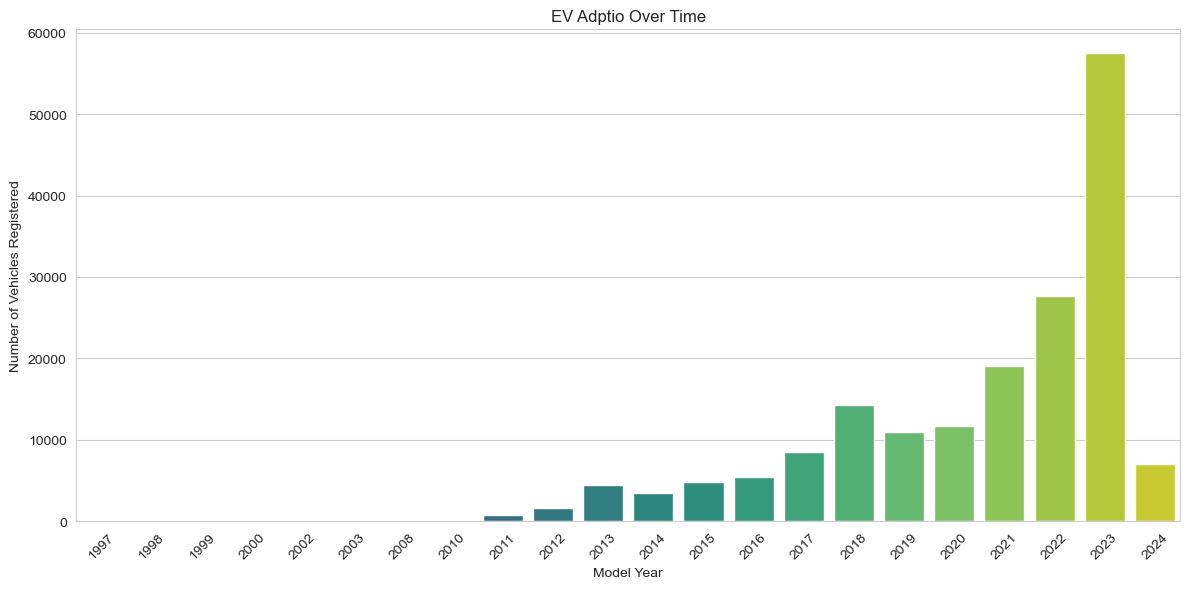

In [8]:
sns.set_style('whitegrid')

# plot ev adoption over time
plt.figure(figsize = (12, 6))
ev_adoption_by_year = ev_data_or['Model Year'].value_counts().sort_index()
sns.barplot(x = ev_adoption_by_year.index, y = ev_adoption_by_year.values, 
           palette='viridis')
plt.title('EV Adptio Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### 2. Top 3 Counties Based on EV Registration

Now, let’s start by selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties:

The graph below compares the number of electric vehicles registered in various cities within three counties: King, Snohomish, and Pierce. The horizontal bars represent cities, and their length corresponds to the number of vehicles registered, colour-coded by county. Here are the key findings from the above graph:

+ Seattle, which is in King County, has the highest number of EV registrations by a significant margin, far outpacing the other cities listed.
+ Bellevue and Redmond, also in King County, follow Seattle with the next highest registrations, though these are considerably less than Seattle’s.
+ Cities in Snohomish County, such as Kirkland and Sammamish, show moderate EV registrations.
+ Tacoma and Tukwila, representing Pierce County, have the fewest EV registrations among the cities listed, with Tacoma slightly ahead of Tukwila.
+ The majority of cities shown are from King County, which seems to dominate EV registrations among the three counties.

Overall, the graph indicates that EV adoption is not uniform across the cities and is more concentrated in certain areas, particularly in King County.

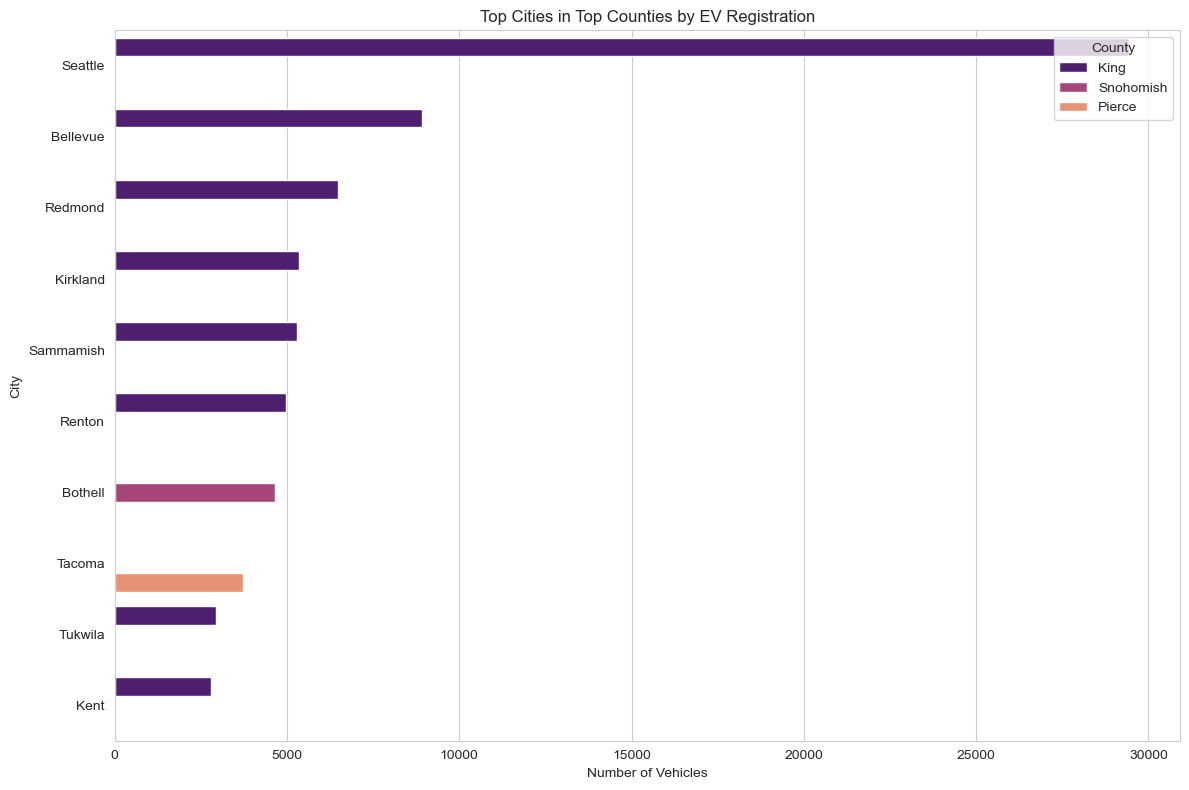

In [9]:
# geographical Distribution at county level
ev_county_distribution = ev_data_or['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# Filtering the dataset for these top countries
top_counties_data = ev_data_or[ev_data_or['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending = False)\
                                    .reset_index(name = 'Number of Vehicles')

# Visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

#plot the distribution
plt.figure(figsize=(12, 8))
sns.barplot(x = 'Number of Vehicles', y = 'City', 
           hue = 'County', data = top_cities,
           palette='magma')
plt.title('Top Cities in Top Counties by EV Registration')
plt.xlabel('Number of Vehicles')
plt.ylabel('City')
plt.legend(title = 'County' )
plt.tight_layout()
plt.show()

Next, let’s explore the types of electric vehicles represented in this dataset. Understanding the breakdown between different EV types, such as Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV), can provide insights into consumer preferences and the adoption patterns of purely electric vs. hybrid electric solutions. 

### 3. Distribution of electric vehicle types to see which categories are most popular among the registered vehicles

The graph below shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered in the United States

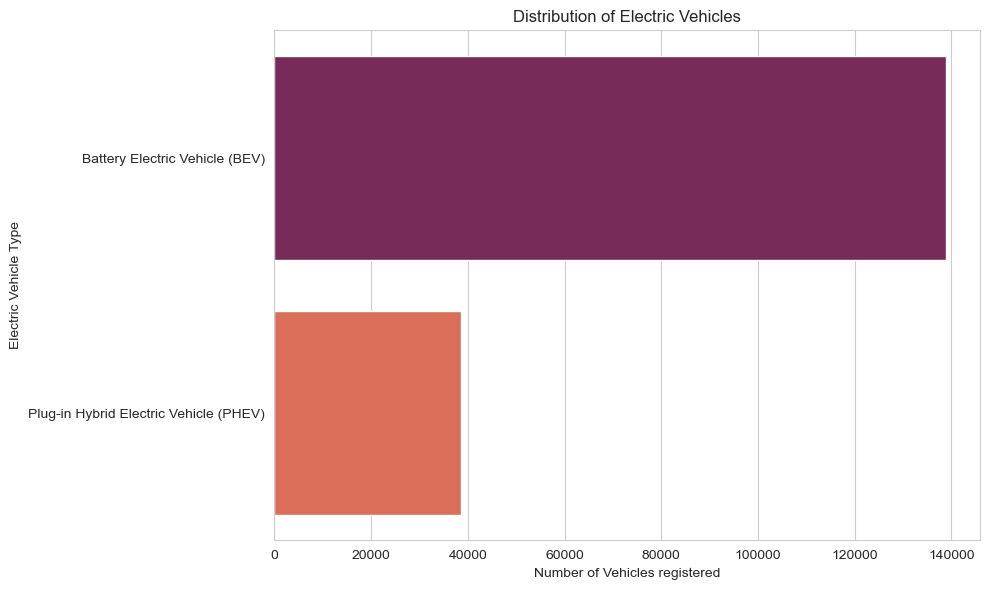

In [10]:
#analyze the distribution of electric cars
ev_type_distribution = ev_data_or['Electric Vehicle Type'].value_counts()

# plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x = ev_type_distribution.values, y = ev_type_distribution.index,
           palette = 'rocket')
plt.title('Distribution of Electric Vehicles')
plt.xlabel('Number of Vehicles registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show;


Let’s now focus on the popularity of electric vehicle manufacturers and models among the registered vehicles. This analysis will help us identify which manufacturers and specific models dominate the EV market, potentially indicating consumer preferences, brand loyalty, and the success of various manufacturers’ strategies in promoting electric mobility.

### 4. Most popular manufacturers 

We will drill down into the most popular models within those manufacturers

The chart below shows that:

+ TESLA leads by a substantial margin with the highest number of vehicles registered.
+ NISSAN is the second most popular manufacturer, followed by CHEVROLET, though both have significantly fewer registrations than TESLA.
+ FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP, and HYUNDAI follow in decreasing order of the number of registered vehicles.

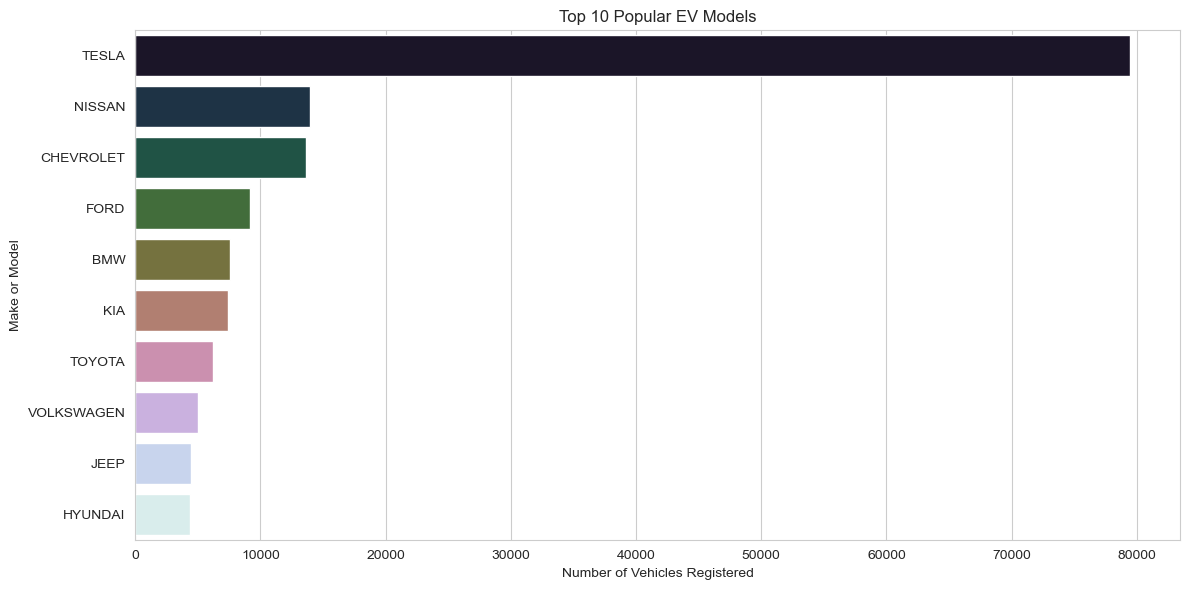

In [11]:
# Get the top ten most popular models
ev_make_distribution = ev_data_or['Make'].value_counts().head(10)

#plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x = ev_make_distribution.values, y = ev_make_distribution.index,
           palette = 'cubehelix')
plt.title('Top 10 Popular EV Models')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make or Model')
plt.tight_layout()
plt.show()

Next, let’s drill down into the most popular models within these top manufacturers to get a more detailed understanding of consumer preferences at the model level

The graph below shows the distribution of electric vehicle registrations among different models from the top three manufacturers: TESLA, NISSAN, and CHEVROLET. Here are the findings:

+ TESLA’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.
+ NISSAN’s LEAF is the third most registered model and the most registered non-TESLA vehicle.
+ TESLA’s MODEL S and MODEL X also have a significant number of registrations.
+ CHEVROLET’s BOLT EV and VOLT are the next in the ranking with considerable registrations, followed by BOLT EUV.
+ NISSAN’s ARIYA and CHEVROLET’s SPARK have the least number of registrations among the models shown.

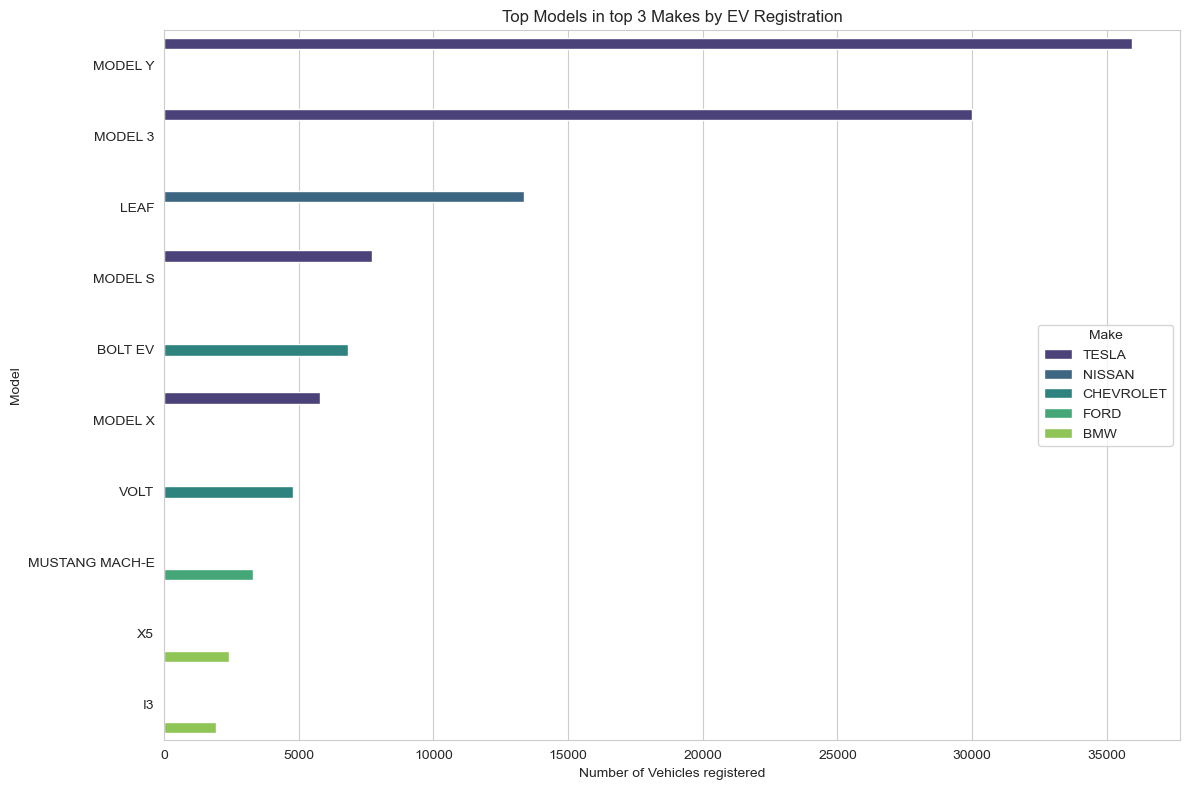

In [12]:
# Select the top 3 manufacturers based on number of vehicles
top_3_makes = ev_make_distribution.head(5).index

# filter the dataset for these top manufacturers
top_makes_data = ev_data_or[ev_data_or['Make'].isin(top_3_makes)]

#anylyze the popularity of EV models wihin these top manufacturers
ev_model_disributuion_top_makes = top_makes_data.groupby(['Make', 'Model']).size()\
                                  .sort_values(ascending = False).reset_index(name = 'Number of Vehicles')

#select top 10 models
top_models = ev_model_disributuion_top_makes.head(10)

# plot the distribution
plt.figure(figsize=(12,8))

sns.barplot(x = 'Number of Vehicles', y = 'Model',
           hue = 'Make', data = top_models, 
           palette = 'viridis')
plt.title('Top Models in top 3 Makes by EV Registration')
plt.xlabel('Number of Vehicles registered')
plt.ylabel('Model')
plt.legend(title = 'Make', loc = 'center right')
plt.tight_layout()
plt.show();

Next, we’ll explore the electric range of vehicles, which is a critical factor for analyzing the market size of electric vehicles. The electric range indicates how far an EV can travel on a single charge, and advancements in battery technology have been steadily increasing these ranges over the years. So, let’s look at the distribution of electric ranges in the dataset and identify any notable trends, such as improvements over time or variations between different vehicle types or manufacturers:

### 5. Distribution of Electric Vehicle Ranges

The graph below shows the mean electric range. Key observations from the graph include:

+ There is a high frequency of vehicles with a low electric range, with a significant peak occurring just before 50 miles.
+ The distribution is skewed to the right, with a long tail extending towards higher ranges, although the number of vehicles with higher ranges is much less frequent.
+ The mean electric range for this set of vehicles is marked at approximately 58.84 miles, which is relatively low compared to the highest ranges shown in the graph.
+ Despite the presence of electric vehicles with ranges that extend up to around 350 miles, the majority of the vehicles have a range below the mean.

It suggests that while there are EVs available with high electric ranges, the average range is skewed lower due to a substantial number of vehicles with shorter ranges

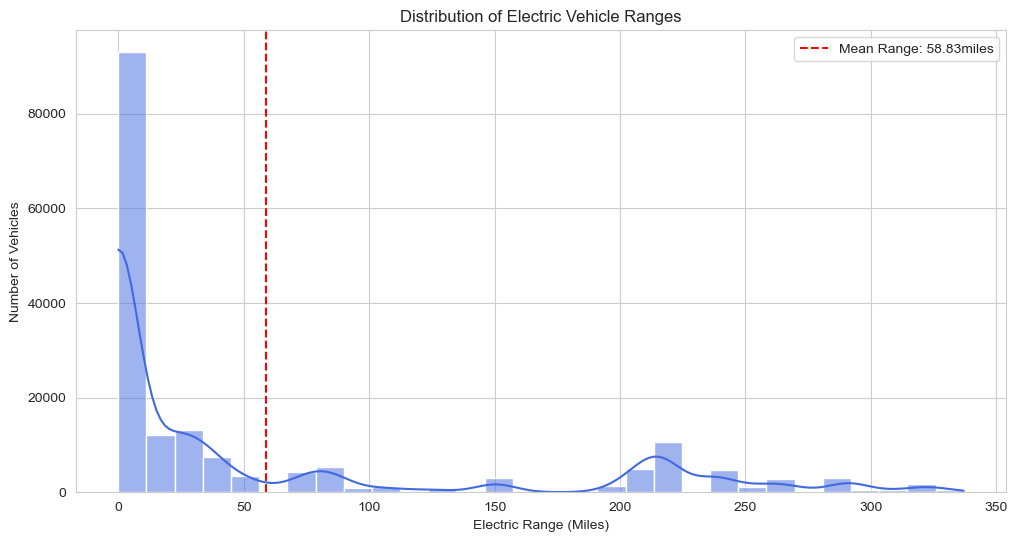

In [13]:
# plot the distribution of electric ranges 
plt.figure(figsize=(12, 6))
sns.histplot(ev_data_or['Electric Range'], bins= 30,
            kde = True, color = 'royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (Miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data_or['Electric Range'].mean(), color = 'red',
           linestyle= '--', label = f'Mean Range: {ev_data_or["Electric Range"].mean():.2f}miles')
plt.legend()
plt.show()

### 6. Trend of Electric Ranges over Model Years

Now, let’s delve into the trend of electric ranges over model years, which can provide insights into how advancements in battery technology and vehicle design have influenced the electric range capabilities of electric vehicles over time. A positive trend in this analysis would indicate continuous improvements, offering consumers EVs with longer driving ranges and potentially addressing one of the major concerns regarding the EV market (range anxiety)

The graph below shows the progression of the average electric range of vehicles from around the year 2000 to 2024. Key findings from the graph:

+ There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.
+ There is a noticeable peak around the year 2020 when the average range reaches its highest point.
+ Following 2020, there’s a significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.
+ After the sharp decline, there is a slight recovery in the average range in the most recent year shown on the graph.

The data suggest that while there have been fluctuations, the overall trend over the last two decades has been toward increasing the electric range of EVs.

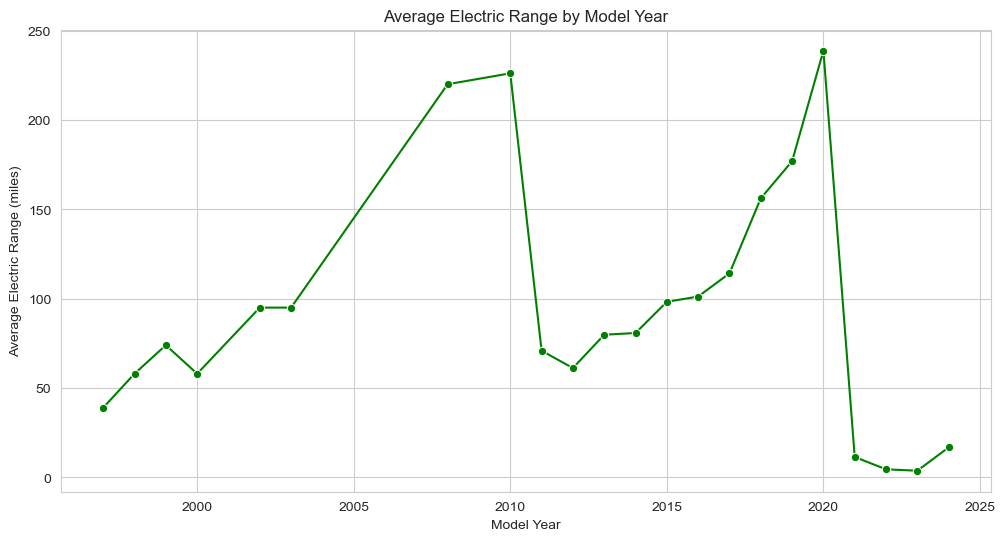

In [14]:
# calculate avg electric range by model year
average_range_by_year = ev_data_or.groupby('Model Year')['Electric Range'].mean().reset_index()

# plot the lineplot
plt.figure(figsize=(12,6))
sns.lineplot(x = 'Model Year', y = 'Electric Range',
            data = average_range_by_year, marker = 'o',
            color = 'green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()


### 7. How does Electric Range Vary Among Various Manufacturers

Next, let’s explore how electric ranges vary among the top manufacturers and models. This analysis can reveal how different manufacturers are addressing the crucial aspect of electric range and highlight which models stand out for their superior range capabilities

The TESLA ROADSTER has the highest average electric range among the models listed. TESLA’s models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the majority of the top positions, indicating that on average, TESLA’s vehicles have higher electric ranges. The CHEVROLET BOLT EV is an outlier among the CHEVROLET models, having a substantially higher range than the VOLT and S-10 PICKUP from the same maker. NISSAN’s LEAF and CHEVROLET’s SPARK are in the lower half of the chart, suggesting more modest average ranges.

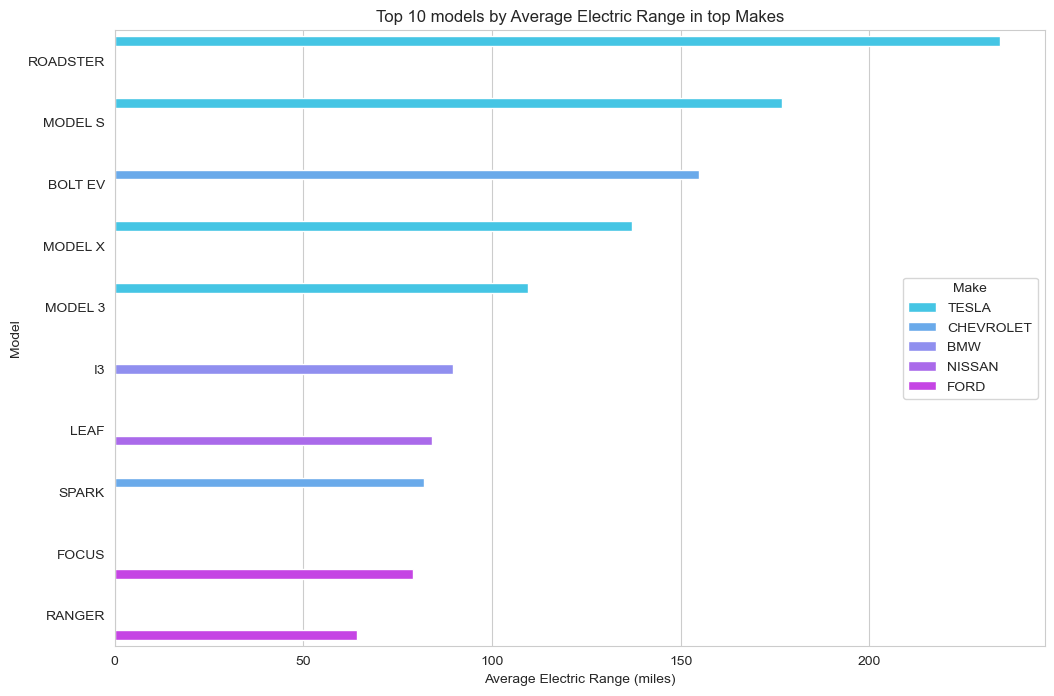

In [15]:
# get the average range by model data 
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range']\
                        .mean().sort_values(ascending = False).reset_index()

# select top 10 models with the highest average electric ranga
top_range_models = average_range_by_model.head(10)

#plot the graph
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x = 'Electric Range', y = 'Model',
                     hue = 'Make', data = top_range_models,
                     palette='cool')
plt.title('Top 10 models by Average Electric Range in top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title = 'Make', loc = 'center right')
plt.show()

### 8. Estimated Market Size Analysis of Electric Vehicles in the United States

Now, let’s move forward towards finding the estimated market size of electric vehicles in the United States. Let's count the number of EVs registered every year

The dataset provides the number of electric vehicles registered each year from 1997 through 2024. However, the data for 2024 is incomplete as it only contains the data till March. Here’s a summary of EV registrations for recent years:

+ In 2021, there were 19,063 EVs registered.
+ In 2022, the number increased to 27708 EVs.
+ In 2023, a significant jump to 57,519 EVs was observed.
+ For 2024, currently, 7,072 EVs are registered, which suggests partial data.

In [16]:
# Calculate the number of EVs registered each year
ev_registration_counts = ev_data_or['Model Year'].value_counts().sort_index()
ev_registration_counts

1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: Model Year, dtype: int64

To forecast the total number of EVs expected to be registered in 2024, we can use a growth rate based approach from previous complete years.

We’ll calculate the Compound Annual Growth Rate (CAGR) between a recent year with complete data (2023) and an earlier year to project the 2024 figures. Additionally, using this growth rate, we can estimate the market size for the next five years. Let’s proceed with these calculations

In [18]:
# filter dataset to include years with complete data, assume 2023 is 
# the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# Define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

#prepare the data for curve ftting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit data to the exponent function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use fitted function to forecast the number of EV for 2024
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecast_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forcasted values for easy
# interpretation
forcasted_evs = dict(zip(forecast_years + filtered_years.index.min(),
                         forecast_values))
print(forcasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


From the graph below, we can see:

+ The number of actual EV registrations remained relatively low and stable until around 2010, after which there was a consistent and steep upward trend, suggesting a significant increase in EV adoption.
+ The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.



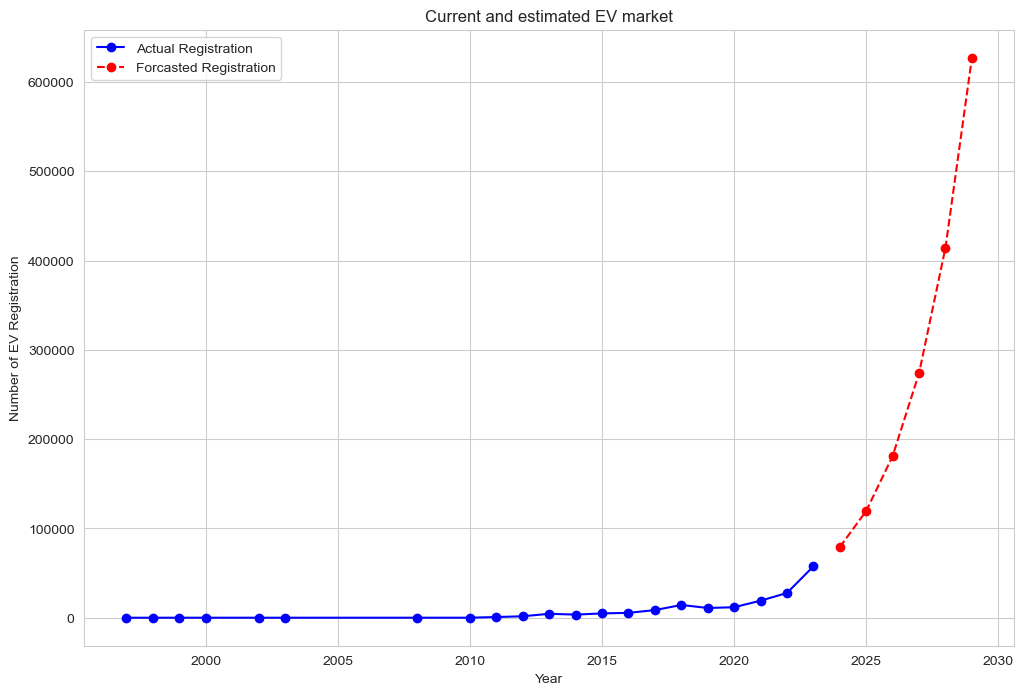

In [21]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_full_years = np.arange(2024, 2029 + 1)

# actual and forcasted values
actual_values = filtered_years.values
forecasted_values_full = [forcasted_evs[year] for year in forecast_full_years]

# plot the graph
plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-',
        label = 'Actual Registration')
plt.plot(forecast_full_years, forecasted_values_full, 'ro--',
        label = 'Forcasted Registration')

plt.title('Current and estimated EV market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registration')
plt.legend()
plt.grid(True)

plt.show()

Given the growing trend in actual EV registrations and the projected acceleration as per the forecast data, we can conclude that the EV market size is expected to expand considerably. The steep increase in forecasted registrations suggests that consumer adoption of EVs is on the rise, and this trend is likely to continue. Overall, the data point towards a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.